<a href="https://colab.research.google.com/github/mariaelisagmt/CartPole/blob/main/CartPoleTeorico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartPole
É um sistema que representa um pêndulo invertido. 
O agente é um carrinho que se moveem um trilho sem atrito de uma dimensão, da esquerda ou para a direita, no carrinho uma estaca pode se mover angularmente em sentido horário e anti-horário.
O objetivo do problema é colocar o carrinho em movimento de modo que o pêndulo permaneça ereta.

#Variáveis
*   Posição p do carrinho no trilho;
*   A velocidade v do carrinho;
*   O ângulo a que a estaca forma com o eixo vertical do carrinho;
*   A velocidade angular va de movimento da estaca.

O ambiente se caracteriza como estocástico, pois não é possível determinar o resultado a partir de um estado atual, e episódico, pois o agente pode tomar qualquer uma das ações disponíveis a qualquer momento, sem que uma ação afete as demais.






#Código
Instalando do recursos e bibliotecas necessárias.

In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [2]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [3]:
!pip install python-math

In [4]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

Definições e configurações de tela.

In [5]:
from pyvirtualdisplay import Display
tela = Display(visible=0, size=(400, 300))
tela.start()



#Ações
É uma implementação de um agente que escolhe uma ação no decorrer do tempo e o ambiente reotrna uma observação e uma recompensa.
Utilizando o ambiente **CartPole-v0** do **OpenAI** da **Gym**.

Um estado desse sistema é terminal nas seguintes situações:
*   Se o centro do carrinho atinge alguma borda do ambiente; (Sucesso)
*   Se a quantidade máxima de episódios definida é atingida; (Sucesso)
*   Se o módulo do ângulo a é maior que 12 graus (o que representa, na prática, a queda da estaca); (Fracasso)

#Recompensas
O ambiente a cada ação retorna uma recompensa que equivale ao valor 1, caso a ação resulte no (1) ou (2) o ambiente retornara um valor true na variável Done. Caso a ação faça a estaca cair a recompensa será zero.

#Funções
A função **step** retorna quatro valores importantes?

*   *observation*: um objeto específico do ambiente que representa sua observação do ambiente. 
*   *reward*: quantidade de recompensa alcançada pela ação anterior. 
*   *done*: variavél booleana que indica o fim de um episódio.
*   *info*: informações de diagnóstico úteis para depuração.


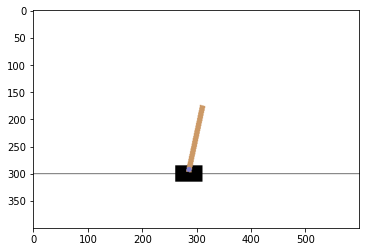

In [6]:
for episodios in range(2):
  ambiente = gym.make("CartPole-v0") #Instancia o ambiente
  ambiente.reset()
  previa_tela = ambiente.render(mode='rgb_array') #Renderizacao da tela
  plt.imshow(previa_tela) 

  for i in range(100):
    acao = ambiente.action_space.sample() #Definindo o conjunto de acoes e observacoes validas (Discrete)
    #action = ambiente.observation_space.sample() #Definindo o conjunto de acoes e observaoes validas (Box)
    obs, reward, done, info = ambiente.step(acao) #Executa as acoes
    screen = ambiente.render(mode='rgb_array') #Renderiza na tela
    
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done: #Define o fim de um episódio
      break
    
ipythondisplay.clear_output(wait=True)
ambiente.close()

#Discretização
Criamos uma **classe Discretizar**, que recebe como parâmetros o limite inferior, o limite superior e a quantidade de **bins** a serem criados. 

Cada uma das variáveis é discretizada e usada para constituir um estado válido a partir da **função gen_state**.

Discretizamos um intervalo que vai de **lower** até **high** em **nbins**, todos valores receberam um mesmo valor de estado. 

In [7]:
class Discretizar:
    def __init__(self,nbins,lower,high):
        self.nbins = nbins
        self.high = high
        self.lower = lower
        self.thresholds = np.array([])
        self.fit()

    def fit(self):
        step=(self.high-self.lower)/self.nbins 
        self.thresholds = np.arange(self.lower, self.high, step) 
        
    def transform(self,x):
        return np.digitize(x,self.thresholds)

Discretização das variáveis posição, velocidade do cartpole, ângulo do pêndulo e velocidade do ângulo.

Limites
*   Posição = [-4.8, 4.8]
*   Ângulo = [-24, 24] graus
*   Velocidade = [-100, 100]
*   Velocidade Angular = [-10, 10]

Discretização de 1000 bins para p, v e a, e de 100 bins para va.


In [8]:
posicao_discreta = Discretizar(nbins = 1000 ,
                               lower = ambiente.observation_space.low[0], 
                               high = ambiente.observation_space.high[0])

velocidade_discreta = Discretizar(nbins = 1000, 
                                  lower = -100 , 
                                  high = 100)

angulo_discreto = Discretizar(nbins = 1000 ,
                              lower = ambiente.observation_space.low[2], 
                              high = ambiente.observation_space.high[2])

velocidade_angular_discreta = Discretizar(nbins = 100, 
                                         lower = -10 , 
                                         high = 10) 


Aplicação das variáveis discretas no ambiente a partir da **função gen_state()**

In [9]:
#Função
gen_state = lambda  p, v, a, va : ( posicao_discreta.transform(p), 
                                    velocidade_discreta.transform(v), 
                                    angulo_discreto.transform(a), 
                                    velocidade_angular_discreta.transform(va) )

#Reinicia o ambiente
ambiente.reset()

#Aplicação
for i in range(20):
    acoes = ambiente.action_space.sample() #0 ir para trás, 1 ir pra frente
    obs, reward, done, info = ambiente.step(acoes)
    p, v, a, va = obs
    print(gen_state(p,v,a,va)) #Discretiza e gera estados válidos

(504, 499, 442, 52)
(504, 498, 450, 53)
(503, 499, 464, 52)
(502, 498, 471, 53)
(501, 497, 485, 55)
(500, 498, 505, 53)
(499, 497, 519, 55)
(498, 498, 539, 53)
(497, 497, 553, 55)
(496, 496, 574, 56)
(494, 497, 602, 55)
(493, 498, 624, 54)
(492, 499, 639, 52)
(491, 498, 648, 54)
(490, 499, 665, 53)
(490, 498, 676, 54)
(489, 497, 695, 56)
(488, 496, 722, 58)
(486, 497, 757, 57)
(485, 496, 786, 58)


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


#Monte Carlo Control

*   **Definição**

Métodos de Monte Carlo (MC) requerem apenas experiência na forma de amostras de sequências de estados, ações e recompensas reais ou interações simuladas com o ambiente. A capacidade de aprender com a experiência é surpreendente, pois
não requer nenhum conhecimento prévio da dinâmica do ambiente.
Os algoritmos de Monte Carlo realizam as estimativas de valor, bem como as mudanças de política no final de cada episódio, trabalhando offline. O termo "Monte Carlo" é geralmente usado para métodos de estimativa cujo
operação envolve um componente arbitrário significativo.

*   **Téoria**

O objetivo dos métodos de Monte Carlo é aprender a função de valor de estado para uma determinada política. Para aprender com a experiência é calcular a média dos retornos observados após as visitas a um estado específico. Com o tempo, como adicional retornos são observados, espera-se que a média convirja para o valor esperado. Este conceito está subjacente todos os métodos de Monte Carlo.

Assim, para estimar 𝑣𝜋 (𝑠), o valor de um estado 𝑠 sob a política 𝜋, assume-se a coleção do episódio
obtido seguindo 𝜋 e passando por 𝑠. Uma ocorrência de um estado 𝑠 em um episódio específico é
comumente conhecido como uma visita a 𝑠. É possível ter várias visitas a um estado específico 𝑠 em um explícito
episódio. Este aspecto apresenta dois métodos diferentes de Monte Carlo, primeira visita MC e cada visita MC,
que têm diferentes propriedades teóricas. Como o nome indica primeira visita, o MC estima 𝑣𝜋 (𝑠) como o
retorna a média após as primeiras visitas a 𝑠, e cada visita MC faz a média dos retornos após todas as visitas a 𝑠.

*   **Monte Carlo Control**

Um método de estimativa de Monte Carlo é uma solução para o problema de controle, uma estratégia para aproximar o ótimo
políticas. Na Iteração de Política Generalizada, uma política aproximada, bem como uma função de valor aproximado
são armazenados. O valor é atualizado de forma consistente para melhor se aproximar da função de valor da política atual. O
a política também é melhorada consistentemente em relação à função de valor atual.
meçando com uma política aleatória 𝜋0 e, terminando com ambos
política ótima e função de valor de ação ideal:
𝜋0
𝐸
→ 𝑞𝜋0
𝐼
→ 𝜋1
𝐸
→ 𝑞𝜋1
𝐼
→ 𝜋2
𝐸
→…
𝐼
→ 𝜋 ∗
𝐸
→ 𝑞 ∗

A avaliação da política é realizada conforme discutido anteriormente. No entanto, neste caso, um número considerável de
episódios são realizados com a função de valor de ação aproximada assintoticamente se aproximando da
função. Os episódios vividos valem-se de inícios de exploração (ES), como fonte de aleatoriedade inicial.
Para realizar a Melhoria da Política, ele precisa ter uma política ambiciosa em relação à função de valor presente.
A função de valor de ação permite um distanciamento da necessidade de ter um modelo para realizar um guloso
política. Para uma função de valor de ação 𝑞, a política gananciosa pode ser traduzida em:
𝜋 = 𝑎𝑟𝑔max𝑎𝑞 (𝑠, 𝑎)
Na avaliação da política de Monte Carlo, é natural alternar entre avaliação e melhoria em uma base de episódio a episódio. Após o episódio, os retornos observados são trabalhados na avaliação de políticas e
consequentemente, a política é aprimorada para todos os estados 𝑠 vividos no episódio. 

*   **Monte Carlo without Exploring Starts**

Embora o início da exploração seja uma solução a considerar ao resolver o problema de controle, ele tem sua desvantagens. A principal desvantagem deste algoritmo diz respeito a ambientes onde todo o espaço de estado e
o espaço de ação é desconhecido.
Duas abordagens diferentes são apresentadas: métodos dentro da política e métodos fora da política. Métodos dentro da política
tentar avaliar ou melhorar a política usada para tomar decisões, ao contrário dos métodos fora da política que avaliam
ou melhorar uma política diferente daquela usada para gerar os dados. MC com ES é um exemplo de método onpolicy. Nos métodos de controle dentro da política, a política 𝜋 é conhecida como suave. O que significa que 𝜋 (𝑎 | 𝑠)> 0 para
todos 𝑠 ∈ 𝑆 e todos 𝑎 ∈ 𝐴, mas irão se aproximar progressivamente de uma política ótima determinística.
Uma maneira de implementar este método on-policy é com políticas 𝜀-greedy (descritas no subcapítulo 3.1.2).
Isso representa a escolha da ação com probabilidade 𝜀 de ser uma ação não com um valor de ação estimado máximo. Todas as ações não gulosas têm uma probabilidade de seleção baixa de 𝜀⁄ | 𝐴 (𝑠) |. No entanto, sem explorar
começa, não é possível melhorar a política apenas executando mais ganancioso, pois evitaria
exploração suplementar de ações não gananciosas. Assim, uma vez que a Iteração de Política Geral (GPI) nãoexigem uma política totalmente gananciosa, mas apenas que siga uma política gananciosa, como 𝜀-ganancioso. O completo
algoritmo é demonstrado no seguinte pseudocódigo.
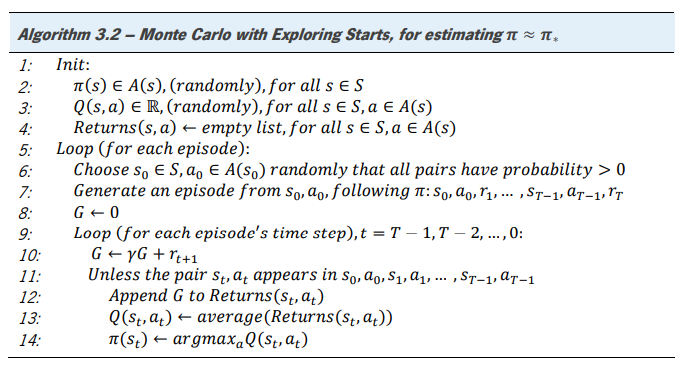
O Teorema da Melhoria da Política garante que uma política 𝜀-gananciosa 𝜋 ′ relativa a 𝑞𝜋 é uma melhoria
sobre qualquer política 𝜀-soft. As condições do Teorema de Melhoria da Política se aplicam porque para qualquer 𝑠 ∈ 𝑆.
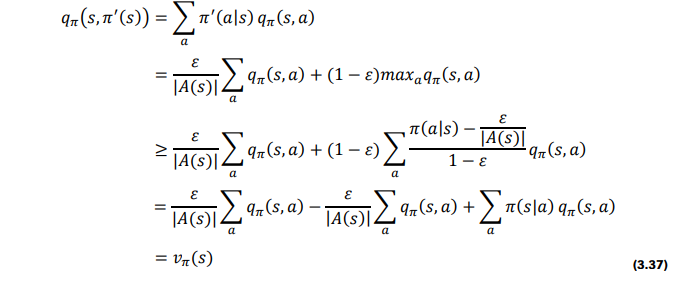




In [10]:
class MonteCarlo():
    def __init__(self, gamma = 0.9, n_episodios = 1000,n0 = 1):
        self.n_episodios = n_episodios #Numero de episodios
        self.gamma = gamma #Gama - relacionado as recompensas
        self.n0 = n0
        self.n_visitas = {}
        self.Q = {}
        self.Q_opt = {}
        self.states = set()
        self.policy = {} #Politica 
        self.values = []
        self.sample_state = (498, 501, 516, 51)
      
    def main(self):
        for  i in range(1, self.n_episodios + 1):
            #Reseta o ambiente
            ambiente.reset()
            #Inicializamos com um estado
            obs = ambiente.step(ambiente.action_space.sample())[0]
            p, v, a, va = obs
            #Dicretiza e gera estados válidos
            init_state = gen_state(p,v,a,va) #estado inicial
            
            self.update_Q(init_state)
            self.values.append( max( self.Q_opt.get(self.sample_state, {}).get((1), 0), 
                                     self.Q_opt.get(self.sample_state, {}).get((0), 0)) )
        self.improvement_policy()
      
  
    def update_Q(self, old_state):
        #Utilizamos umas estrutura recursiva para atualizar Q
        self.states.add(old_state)
        acoes = (ambiente.action_space.sample())
        obs, reward, done, info = ambiente.step(acoes) 
        p, v, a, va = obs
        new_state = gen_state(p,v,a,va) #Discretiza e gera estados válidos
        
        Gt = 0
        #Se deu errado
        if(done == False):
            Gt = self.gamma * self.update_Q(new_state)
        #Atualizacao dos pontos
        Gt = Gt + reward
        #Formula
        self.n_visitas[(old_state, acoes)] = self.n_visitas.get((old_state, acoes),0) + 1 #Para casa visita acrescenta 1
        self.Q[(old_state, acoes)] = self.Q.get((old_state, acoes),0) + (Gt-self.Q.get((old_state, acoes),0)) / self.n_visitas[(old_state, acoes)]
    
        #Rescreve Q para Q_opt para melhor acesso
        if(self.Q_opt.get(old_state)):
            self.Q_opt.get(old_state).update({acoes : self.Q[(old_state, acoes)]})
        else:
            self.Q_opt[old_state] = {acoes:self.Q[(old_state, acoes)]} 
        return Gt
    
    #Exploration x exploitation
    def improvement_policy(self):
        for st in self.states:
            n = self.n_visitas.get((st,0),0) + self.n_visitas.get((st,1),0) #Número de vezes que o estado foi visitado
            ek = self.n0 / (self.n0+n)
            maximo = np.max(self.Q_opt[st].values())
            
            for a in self.Q_opt[st].keys():
                if(maximo == self.Q_opt[st][a]):
                    self.policy[(st,a)] = ek / 2+1-ek
                else:
                    self.policy[(st,a)] = ek/2


O aprendizado por reforço pelo método de Monte Carlo consiste em que o agente, após completar um episódio inteiro, seja informado sobre o valor da recompensa obtida.
O state value é aprendido a partir de uma média de N amostras de episódios que foram iniciados em um mesmo estado. 

In [ ]:
#Variamos o número de episodes para MC
mcs = []

for i in range(1,5):
    start_time = time.time()
    mc = MonteCarlo(n_episodios = 1000)
    mc.main()
    mcs.append(mc)
    end_time = time.time()
    total_time = end_time - start_time
    print("Tempo total de execução para 10^{} episódios: {} segundos".format(i, total_time))

Tempo total de execução para 10^1 episódios: 0.1720888614654541 segundos
Tempo total de execução para 10^2 episódios: 0.18381571769714355 segundos
Tempo total de execução para 10^3 episódios: 0.18249893188476562 segundos
Tempo total de execução para 10^4 episódios: 0.20370793342590332 segundos


Calcula a média de quantas ações o pêndulo faz antes de cair.

In [ ]:
def mean_actions(Q, n = 100):
    mean=0
    for i in range(n):
        ambiente.reset()
        obs, reward, done = ambiente.step(ambiente.action_space.sample())[:3]
        p, v, a, va = obs
        state = gen_state(p,v,a,va) #Discretiza e gera estados válidos
        k = 0
        #Se não tiver sucesso
        while(done == False):
            #Se caso o estado não for alcançado, ele escolhe uma ação randomica
            s1 = Q.get((state,(1)), ambiente.action_space.sample()) 
            s2 = Q.get((state,(0)), ambiente.action_space.sample())
            acoes = 1 if(s1>s2) else 0
            obs, reward, done, info = ambiente.step(acoes) #obs é um vetor com 4 valores, Position, Cart Velocity, Angle, Angle Velocity
            p, v, a, va=obs
            state = gen_state(p,v,a,va) #Discretiza e gera estados válidos
            k += 1
        mean += k
    mean = mean/n
    
    return mean

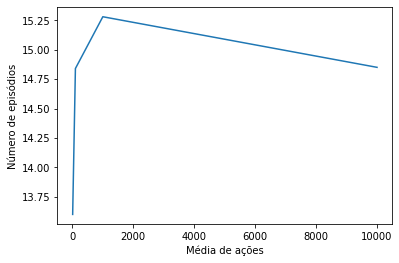

In [ ]:
means = []
for m in mcs:
    means.append(mean_actions(m.Q))
means

eps = [10, 100, 1000, 10000]
y = means
plt.xlabel("Média de ações")
plt.ylabel("Número de episódios")
plt.plot(eps, y)

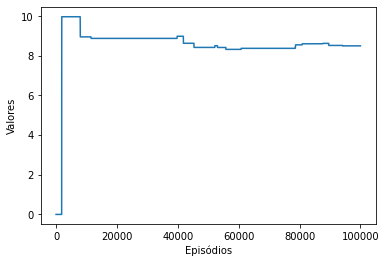

In [ ]:
mc = MonteCarlo(n_episodios=100000)
mc.main()
x = list(range(1, mc.n_episodios + 1))
y = mc.values
plt.ylabel("Valores")
plt.xlabel("Episódios")
plt.plot(x, y)